# **Importacion de bibleotecas**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


#📌 Extracción

## Convertir los datos a un DataFrame de Pandas para facilitar su manipulación. Y revisión del data frame

In [ ]:
datos = pd.read_json('TelecomX_Data.json')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
datos['customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: customer
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


#🔧 Transformación

### Normalizacion de dato --para las columnas 'customer, phone, internet y account' --

In [ ]:
columnas = list(datos.columns) # muestra las columnas del df
columnas


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [ ]:
datos_n_customer = pd.json_normalize(datos['customer'])
datos_n_phone = pd.json_normalize(datos['phone'])
datos_n_internet = pd.json_normalize(datos['internet'])
datos_n_account = pd.json_normalize(datos['account'])

In [ ]:
datos_normalizados = pd.concat([datos["customerID"], datos["Churn"], datos_n_customer, datos_n_phone, datos_n_internet, datos_n_account], axis=1)
datos_normalizados.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
col_object_a_string = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' ]
col_object_a_string

['gender',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
datos_normalizados[col_object_a_string] = datos_normalizados[col_object_a_string].astype("string")

In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   string 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   string 
 8   MultipleLines     7267 non-null   string 
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   string 
 11  OnlineBackup      7267 non-null   string 
 12  DeviceProtection  7267 non-null   string 
 13  TechSupport       7267 non-null   string 
 14  StreamingTV       7267 non-null   string 
 15  StreamingMovies   7267 non-null   string 
 16  Contract          7267 non-null   string 


In [ ]:
datos_normalizados['Charges.Total'].head()

,Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4


In [ ]:
datos_normalizados['Charges.Total'] = datos_normalizados['Charges.Total'].apply(lambda x: x.replace('$', '').replace('.', '').strip())


In [ ]:
datos_normalizados['Charges.Total'] = datos_normalizados['Charges.Total'].replace('', np.nan).astype(float)

In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   string 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   string 
 8   MultipleLines     7267 non-null   string 
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   string 
 11  OnlineBackup      7267 non-null   string 
 12  DeviceProtection  7267 non-null   string 
 13  TechSupport       7267 non-null   string 
 14  StreamingTV       7267 non-null   string 
 15  StreamingMovies   7267 non-null   string 
 16  Contract          7267 non-null   string 


In [ ]:
datos_normalizados['Partner'] = datos_normalizados['Partner'].astype('string')

In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   string 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   string 
 5   Dependents        7267 non-null   string 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   string 
 8   MultipleLines     7267 non-null   string 
 9   InternetService   7267 non-null   string 
 10  OnlineSecurity    7267 non-null   string 
 11  OnlineBackup      7267 non-null   string 
 12  DeviceProtection  7267 non-null   string 
 13  TechSupport       7267 non-null   string 
 14  StreamingTV       7267 non-null   string 
 15  StreamingMovies   7267 non-null   string 
 16  Contract          7267 non-null   string 


In [ ]:
datos_normalizados['Cuentas_Diarias'] = datos_normalizados['Charges.Monthly'] / 30


In [ ]:
datos = datos_normalizados
datos.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,5933.0,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,5424.0,1.996667


### **Estandarización y transformación de datos**

#### Cambio de 'Yes' y 'No' a sistema binario (0 - 1)

---



In [ ]:

binary_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'PaperlessBilling']


for col in binary_cols:
    datos[col] = datos[col].map({'Yes': 1, 'No': 0})

display(datos.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,5933.0,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,5424.0,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,28085.0,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,123785.0,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,2674.0,2.796667


#### Traduccion de nombres de columnas al español para facilidad de manipulacion y entendimiento

In [ ]:
datos.rename(columns={'customerID': 'ID_Cliente'}, inplace=True)
datos.rename(columns={'Churn': 'Evasion_cliente'}, inplace=True)
datos.rename(columns={'gender': 'Genero'}, inplace=True)
datos.rename(columns={'SeniorCitizen': 'Jubilado'}, inplace=True)
datos.rename(columns={'Partner': 'Pareja'}, inplace=True)
datos.rename(columns={'Dependents': 'Dependientes'}, inplace=True)
datos.rename(columns={'tenure': 'Antigüedad '}, inplace=True)
datos.rename(columns={'PhoneService': 'Servicio_Telefonico'}, inplace=True)
datos.rename(columns={'MultipleLines': 'Multiples_Lineas'}, inplace=True)
datos.rename(columns={'InternetService': 'Servicio_Internet'}, inplace=True)
datos.rename(columns={'OnlineSecurity': 'Seguridad_Online'}, inplace=True)
datos.rename(columns={'OnlineBackup': 'Respaldo_Online'}, inplace=True)
datos.rename(columns={'DeviceProtection': 'Protección_Dispositivos'}, inplace=True)
datos.rename(columns={'TechSupport': 'Soporte_Tecnico'}, inplace=True)
datos.rename(columns={'StreamingTV': 'Streaming_TV'}, inplace=True)
datos.rename(columns={'StreamingMovies': 'Streaming_Peliculas'}, inplace=True)
datos.rename(columns={'Contract': 'Contrato'}, inplace=True)
datos.rename(columns={'PaperlessBilling': 'Facturacion_Electronica'}, inplace=True)
datos.rename(columns={'PaymentMethod': 'Metodo_Pago'}, inplace=True)
datos.rename(columns={'Charges.Monthly': 'Cobro_Mensual'}, inplace=True)
datos.rename(columns={'Charges.Total': 'Cobro_Total'}, inplace=True)
datos.rename(columns={'MultipleLines': 'Multiples_Lineas'}, inplace=True)

display(datos.head())

,ID_Cliente,Evasion_cliente,Genero,Jubilado,Pareja,Dependientes,Antigüedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Protección_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Cobro_Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,5933.0,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,5424.0,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,28085.0,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,123785.0,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,2674.0,2.796667


In [ ]:
datos['Genero'] = datos['Genero'].map({'Female': 'Femenino', 'Male': 'Masculino'})
datos['Servicio_Internet'] = datos['Servicio_Internet'].map({'Fiber optic': 'Fibra Óptica', 'DSL': 'Cable', 'No': '0'})
datos['Contrato'] = datos['Contrato'].map({'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Doble'})
datos['Metodo_Pago'] = datos['Metodo_Pago'].map({'Electronic check': 'Cheque Electrónico', 'Mailed check': 'Cheque Postal',
                                                 'Bank transfer (automatic)': 'Transferencia Bancaria', 'Credit card (automatic)': 'Tarjeta de Crédito'})

display(datos.head())

,ID_Cliente,Evasion_cliente,Genero,Jubilado,Pareja,Dependientes,Antigüedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Protección_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Cobro_Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Femenino,0,1,1,9,1,0.0,Cable,...,0.0,1.0,1.0,0.0,Anual,1,Cheque Postal,65.6,5933.0,2.186667
1,0003-MKNFE,0.0,Masculino,0,0,0,9,1,1.0,Cable,...,0.0,0.0,0.0,1.0,Mensual,0,Cheque Postal,59.9,5424.0,1.996667
2,0004-TLHLJ,1.0,Masculino,0,0,0,4,1,0.0,Fibra Óptica,...,1.0,0.0,0.0,0.0,Mensual,1,Cheque Electrónico,73.9,28085.0,2.463333
3,0011-IGKFF,1.0,Masculino,1,1,0,13,1,0.0,Fibra Óptica,...,1.0,0.0,1.0,1.0,Mensual,1,Cheque Electrónico,98.0,123785.0,3.266667
4,0013-EXCHZ,1.0,Femenino,1,1,0,3,1,0.0,Fibra Óptica,...,0.0,1.0,1.0,0.0,Mensual,1,Cheque Postal,83.9,2674.0,2.796667


In [ ]:
datos['Servicio_Internet'].head(5)


,Servicio_Internet
0,Cable
1,Cable
2,Fibra Óptica
3,Fibra Óptica
4,Fibra Óptica


#📊 Carga y análisis

## **Analisis descriptivo**

### Calculo de la Media, mediana, desviacion estandar (usando la funcion describe( ) )

In [ ]:
datos.head(2)

,ID_Cliente,Evasion_cliente,Genero,Jubilado,Pareja,Dependientes,Antigüedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Protección_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cobro_Mensual,Cobro_Total,Cuentas_Diarias
0,0002-ORFBO,0.0,Femenino,0,1,1,9,1,0.0,Cable,...,0.0,1.0,1.0,0.0,Anual,1,Cheque Postal,65.6,5933.0,2.186667
1,0003-MKNFE,0.0,Masculino,0,0,0,9,1,1.0,Cable,...,0.0,0.0,0.0,1.0,Mensual,0,Cheque Postal,59.9,5424.0,1.996667


In [ ]:
numerical_cols = datos.select_dtypes(include=np.number)
display(numerical_cols.describe())

,Evasion_cliente,Jubilado,Pareja,Dependientes,Antigüedad,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Protección_Dispositivos,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Electronica,Cobro_Mensual,Cobro_Total,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,126342.563534,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,193017.805646,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,19.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,7545.000000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,36435.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,142570.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,867245.000000,3.958333


### Distribucion de evasion de los clientes

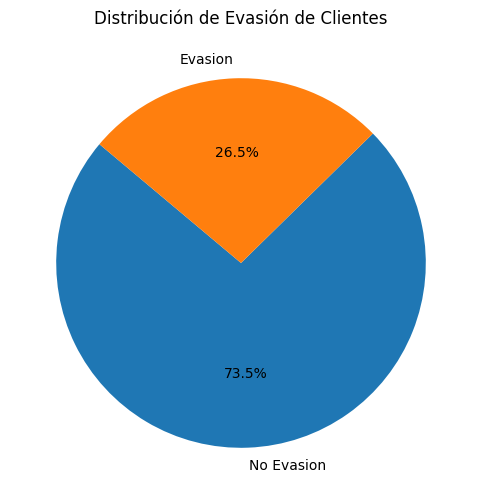

In [ ]:
grafico_evacion = datos['Evasion_cliente'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(grafico_evacion, labels=['No Evasion', 'Evasion'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Evasión de Clientes')
plt.show()

### recuento de evasion por variables categoricas

In [ ]:
columnas_conparacion = ['Genero', 'Contrato', 'Metodo_Pago', 'Servicio_Internet']

for col in columnas_conparacion:
    comparativa_evacion = datos.groupby(col)['Evasion_cliente'].value_counts(normalize=True).unstack()
    print(f"Distribución de Evasión por {col}:")
    display(comparativa_evacion)
    print("-" * 50)

Distribución de Evasión por Genero:


Evasion_cliente,0.0,1.0
Genero,,
Femenino,0.730791,0.269209
Masculino,0.738397,0.261603


--------------------------------------------------
Distribución de Evasión por Contrato:


Evasion_cliente,0.0,1.0
Contrato,,
Anual,0.887305,0.112695
Doble,0.971681,0.028319
Mensual,0.572903,0.427097


--------------------------------------------------
Distribución de Evasión por Metodo_Pago:


Evasion_cliente,0.0,1.0
Metodo_Pago,,
Cheque Electrónico,0.547146,0.452854
Cheque Postal,0.808933,0.191067
Tarjeta de Crédito,0.847569,0.152431
Transferencia Bancaria,0.832902,0.167098


--------------------------------------------------
Distribución de Evasión por Servicio_Internet:


Evasion_cliente,0.0,1.0
Servicio_Internet,,
0,0.925950,0.074050
Cable,0.810409,0.189591
Fibra Óptica,0.581072,0.418928


--------------------------------------------------


### Conteo de evasion por variables numericas

In [ ]:
# Elimina todas las filas donde Evasion_cliente es NaN
datos_limpios = datos.dropna(subset=['Evasion_cliente'])

df_evasores = datos_limpios[datos_limpios['Evasion_cliente'] == 1]
df_no_evasores = datos_limpios[datos_limpios['Evasion_cliente'] == 0]

print(df_evasores.head(2))

In [ ]:
df_no_evasores['Antigüedad '].describe()

,Antigüedad
count,5174.000000
mean,37.569965
std,24.113777
min,0.000000
25%,15.000000
50%,38.000000
75%,61.000000
max,72.000000


In [ ]:
df_evasores['Antigüedad '].describe()

,Antigüedad
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


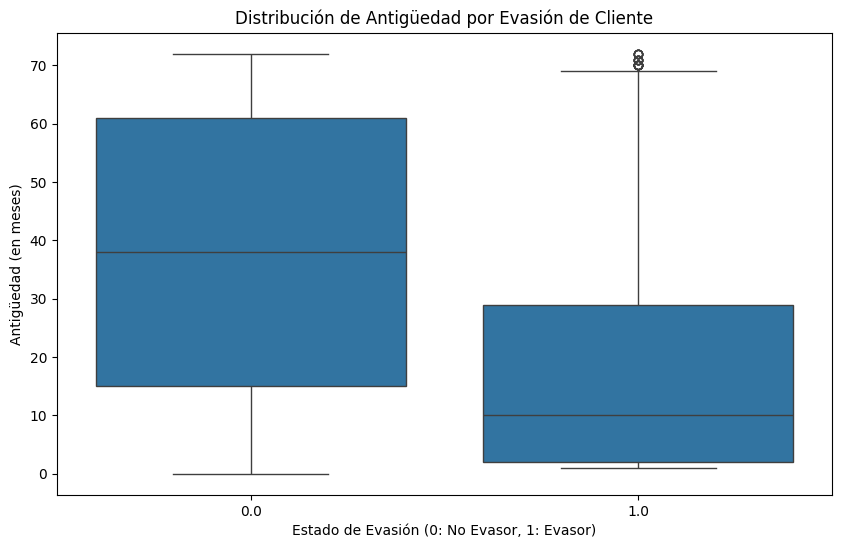

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_cliente', y='Antigüedad ', data=datos_limpios)
plt.title('Distribución de Antigüedad por Evasión de Cliente')
plt.xlabel('Estado de Evasión (0: No Evasor, 1: Evasor)')
plt.ylabel('Antigüedad (en meses)')
plt.show()

In [ ]:
df_no_evasores['Cobro_Mensual'].describe()

,Cobro_Mensual
count,5174.000000
mean,61.265124
std,31.092648
min,18.250000
25%,25.100000
50%,64.425000
75%,88.400000
max,118.750000


In [ ]:
df_evasores['Cobro_Mensual'].describe()

,Cobro_Mensual
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000


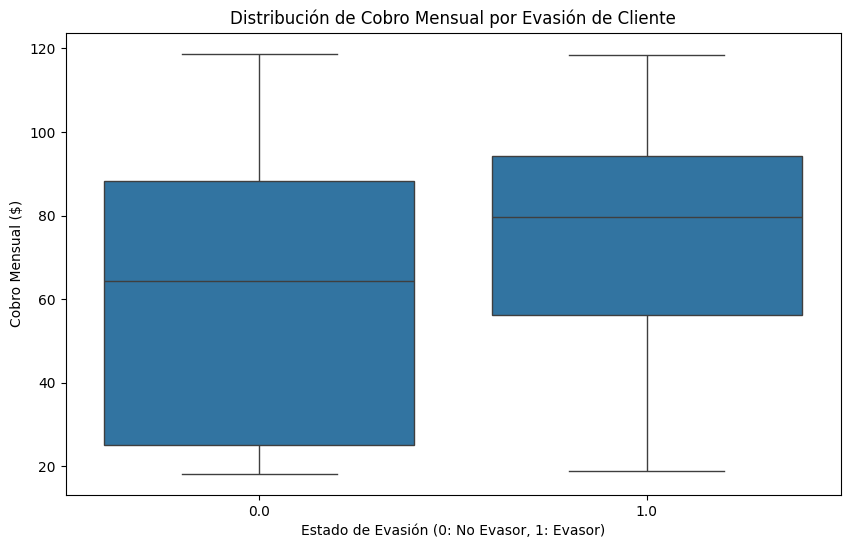

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_cliente', y='Cobro_Mensual', data=datos_limpios)
plt.title('Distribución de Cobro Mensual por Evasión de Cliente')
plt.xlabel('Estado de Evasión (0: No Evasor, 1: Evasor)')
plt.ylabel('Cobro Mensual ($)')
plt.show()

In [ ]:
df_no_evasores['Cobro_Total'].describe()

,Cobro_Total
count,5163.000000
mean,140548.655239
std,202903.133836
min,19.000000
25%,10433.500000
50%,46161.000000
75%,170645.000000
max,867245.000000


In [ ]:
df_evasores['Cobro_Total'].describe()

,Cobro_Total
count,1869.000000
mean,86758.005886
std,153678.004015
min,20.000000
25%,3891.000000
50%,16545.000000
75%,79425.000000
max,796885.000000


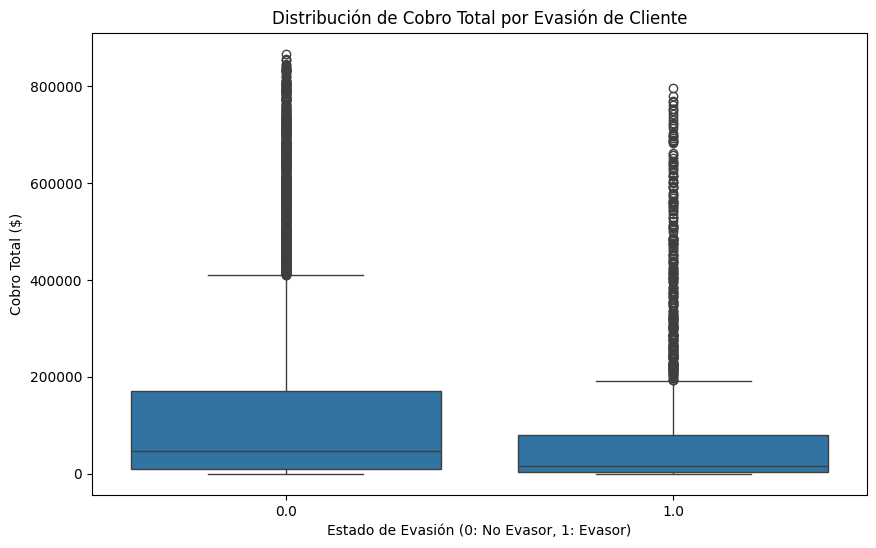

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_cliente', y='Cobro_Total', data=datos_limpios)
plt.title('Distribución de Cobro Total por Evasión de Cliente')
plt.xlabel('Estado de Evasión (0: No Evasor, 1: Evasor)')
plt.ylabel('Cobro Total ($)')
plt.show()


#📄Informe final

## Introducción

El presente informe detalla un análisis exploratorio de datos (EDA) enfocado en el problema de la evasión de clientes (churn) en una empresa de telecomunicaciones. El objetivo principal es identificar patrones y factores clave, basados en variables numéricas como la antigüedad y los cobros del cliente, que influyen en el comportamiento de cancelación. Los hallazgos de este análisis servirán como base para desarrollar estrategias efectivas de retención de clientes.

## Limpieza y Tratamiento de Datos

Antes de iniciar el análisis, se realizó una fase de preprocesamiento para asegurar la calidad y consistencia de los datos. Los pasos clave incluyeron:

Normalización de Datos: Se unieron los datos provenientes de diferentes fuentes (cliente, teléfono, internet y cuenta) en un único DataFrame para facilitar el análisis integral.

Traducción de Columnas y Datos: Para una mejor legibilidad y comprensión, se tradujeron los nombres de las columnas y los valores categóricos (ej. Male/Female a Masculino/Femenino, y Fiber optic a Fibra Óptica).

Manejo de Datos Faltantes: Se identificó la presencia de valores nulos (NaN) en la columna 'Evasion_cliente'. Estas filas se eliminaron para garantizar que la segmentación de los clientes fuera precisa y no se introdujeran sesgos en el análisis.

Conversión de Tipos de Datos: La columna 'Cobro_Total' se convirtió a un tipo de dato numérico para permitir el análisis y la visualización, ya que contenía valores no numéricos.



## Análisis Exploratorio de Datos

Se realizó un análisis comparativo de las variables numéricas clave para entender sus distribuciones entre los clientes que cancelaron y los que no. A continuación, se presentan los hallazgos principales.

###Antigüedad del Cliente (Antigüedad):

Hallazgo: La antigüedad media de los clientes que cancelaron es de 17.98 meses, significativamente menor que la de los clientes que se quedaron, que es de 37.57 meses. El 50% de los evasores tenían 10 meses o menos de antigüedad.

Visualización: El diagrama de caja de la antigüedad muestra claramente que la distribución del grupo de evasores se concentra en valores más bajos, lo que confirma que la mayoría de las cancelaciones ocurren en las primeras etapas de la relación con el cliente.

###Cobro Mensual (Cobro_Mensual):

Hallazgo: El cobro mensual medio para los clientes que cancelaron es de 74.44, notablemente más alto que el de los clientes que no cancelaron, que es de 61.27. La mediana del grupo de evasores (79.65) también es más alta que la del grupo de no evasores (64.42).

Visualización: El diagrama de caja de los cobros mensuales revela que la distribución del grupo de evasores se inclina hacia valores más altos, sugiriendo que los clientes con facturas mensuales más elevadas son más propensos a la evasión.

###Cobro Total (Cobro_Total):

Hallazgo: El cobro total medio de los clientes que se quedaron es de $140,548.66, mientras que el de los clientes que cancelaron es de (86,758.01). La mediana del grupo de evasores (16,545.00) es considerablemente más baja que la del grupo de no evasores (46,161.00).

Visualización: El diagrama de caja del cobro total indica una diferencia marcada entre los grupos, sugiriendo que los clientes con un gasto total acumulado bajo tienen un riesgo de evasión mucho mayor.

## Conclusiones e Insights

Este análisis ha revelado tres factores numéricos cruciales en el comportamiento de evasión de clientes:

La Antigüedad es un Indicador Clave: Los clientes con menor antigüedad son más propensos a cancelar. Esto sugiere que el período inicial de la relación es el más crítico.

El Cobro Mensual Influye en la Decisión: Existe una correlación positiva entre el cobro mensual y la evasión; los clientes con facturas más altas son más propensos a cancelar, posiblemente debido a la percepción de un bajo valor por el precio o a la existencia de ofertas más competitivas.

El Gasto Acumulado es un Predictor de Riesgo: Los clientes con un bajo cobro total representan un segmento de alto riesgo de evasión.

## Recomendaciones

Basado en los hallazgos, se proponen las siguientes estrategias para reducir la tasa de evasión:

Programa de Retención para Clientes Nuevos: Implementar un programa de seguimiento y soporte intensivo durante los primeros 6 meses de servicio para abordar proactivamente cualquier problema que pueda llevar a la cancelación.

Estrategias de Precios y Valor: Revisar la estructura de precios para clientes con cobros mensuales elevados. Ofrecer beneficios o servicios adicionales que justifiquen el costo y aumenten su satisfacción.

Incentivos para Compromisos a Largo Plazo: Ofrecer descuentos o promociones a los clientes con contratos de corta duración para incentivarlos a pasar a contratos más largos, reduciendo así su riesgo de evasión.

#¡Extra! Análisis de correlación entre variables

##La relación entre la cuenta diaria y la evasión.

In [56]:
correlaciones_con_evasion = datos_limpios[['Evasion_cliente', 'Antigüedad ', 'Cobro_Mensual', 'Cobro_Total']].corr()['Evasion_cliente']

correlaciones_con_evasion

,Evasion_cliente
Evasion_cliente,1.000000
Antigüedad,-0.352229
Cobro_Mensual,0.193356
Cobro_Total,-0.123433


##Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

In [55]:
servicios = ['Servicio_Telefonico', 'Seguridad_Online', 'Respaldo_Online', 'Protección_Dispositivos', 'Soporte_Tecnico']
datos_limpios['Numero_Servicios'] = datos_limpios[servicios].sum(axis=1)

correlacion_servicios = datos_limpios['Numero_Servicios'].corr(datos_limpios['Evasion_cliente'])
correlacion_servicios

/tmp/ipython-input-3823709419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['Numero_Servicios'] = datos_limpios[servicios].sum(axis=1)


np.float64(-0.17021213215788628)

## Grafico matriz de correlación

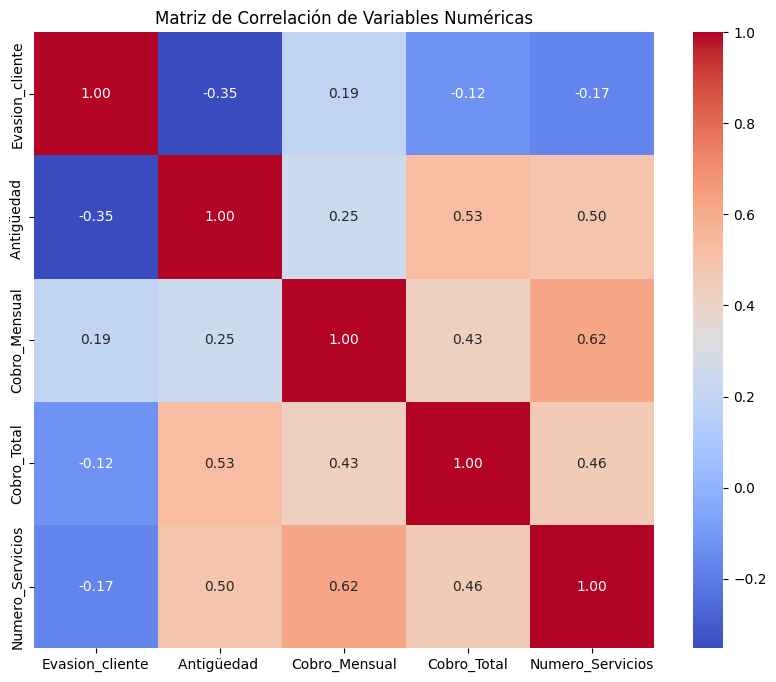

In [54]:
import seaborn as sns

columnas_numericas = ['Evasion_cliente', 'Antigüedad ', 'Cobro_Mensual', 'Cobro_Total', 'Numero_Servicios']
matriz_correlacion = datos_limpios[columnas_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()